No algorithm is working correctly on core loss


In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train=pd.read_csv('data_ml.csv')
df_train

,RI,wl,tg,A,da2,CM,core loss
0,1.4,900,40,1.8,1.0,1.4379,9.1
1,1.4,910,40,1.8,1.0,1.4375,11.6
2,1.4,920,40,1.8,1.0,1.4371,15.2
3,1.4,930,40,1.8,1.0,1.4367,20.1
4,1.4,940,40,1.8,1.0,1.4363,27.1
...,...,...,...,...,...,...,...
551,1.4,1040,40,1.9,1.2,1.4330,20.2
552,1.4,1050,40,1.9,1.2,1.4327,18.3
553,1.4,1060,40,1.9,1.2,1.4323,16.3
554,1.4,1070,40,1.9,1.2,1.4320,15.4


In [3]:
df_ex=pd.read_excel('1.40 data ml.xlsx')

In [4]:
df_ex.to_csv('df.csv', encoding='utf-8', index=False)
df_csv=pd.read_csv('df.csv')


In [5]:
df_csv

,RI,wl,tg,A,da2,CM,core loss
0,1.4,900,40,1.8,1,1.437900,9.1
1,1.4,910,40,1.8,1,1.437500,11.6
2,1.4,920,40,1.8,1,1.437100,15.2
3,1.4,930,40,1.8,1,1.436700,20.1
4,1.4,940,40,1.8,1,1.436300,27.1
...,...,...,...,...,...,...,...
76,1.4,930,40,2.0,1,1.440000,8.9
77,1.4,940,40,2.0,1,1.439533,7.9
78,1.4,950,40,2.0,1,1.439083,7.4
79,1.4,960,40,2.0,1,1.438633,6.6


In [6]:
df=pd.concat([df_train,df_csv], axis=0,ignore_index=True)


In [7]:
desired_value = '122..5'
result = df[df['core loss'] == desired_value]
result

,RI,wl,tg,A,da2,CM,core loss
599,1.4,950,40,1.9,1.0,1.438,122..5


In [8]:
df['core loss']=np.where(df['core loss'] == '122..5', '122.5', df['core loss'])

In [9]:
df['core loss']=np.where(df['core loss'] == '10..9', '10.9', df['core loss'])

In [10]:
df['core loss']=df['core loss'].astype(np.float64)

In [11]:
cv=pd.read_csv('data_ml_2.csv')

In [12]:
print(cv.describe())
print(cv.shape)

              RI           wl    tg             A   da2         CM   core loss
count  91.000000    91.000000  91.0  9.100000e+01  91.0  91.000000   91.000000
mean    1.381868   813.516484  40.0  1.900000e+00   1.0   1.443201   21.135165
std     0.014056   106.294911   0.0  3.349122e-15   0.0   0.004092   22.360319
min     1.360000   630.000000  40.0  1.900000e+00   1.0   1.434300    2.100000
25%     1.370000   730.000000  40.0  1.900000e+00   1.0   1.440300    8.100000
50%     1.380000   800.000000  40.0  1.900000e+00   1.0   1.443600   13.800000
75%     1.390000   890.000000  40.0  1.900000e+00   1.0   1.446350   24.550000
max     1.400000  1050.000000  40.0  1.900000e+00   1.0   1.450700  122.500000
(91, 7)


In [13]:
cvx = cv.drop(['core loss'],axis=1) # All columns except the last two
cvy = cv.iloc[:,6:7]  # Last two columns
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

# Fit and transform X_train
scaled_data_cvx = scaler.fit_transform(cvx.values)
cv_x = pd.DataFrame(scaled_data_cvx, index=cv.index, columns=cvx.columns)


scalery = StandardScaler()

# Fit and transform X_train
scaled_y = scalery.fit_transform(cvy.values)
cv_y = pd.DataFrame(scaled_y, index=cvy.index, columns=cvy.columns)

In [14]:
# cv_x = cv.drop(['core loss'],axis=1) # All columns except the last
# cv_y = cv.iloc[:,6:7]  # Last column

In [15]:
df.describe()

,RI,wl,tg,A,da2,CM,core loss
count,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000
mean,1.397410,933.751962,39.908948,1.897645,1.000000,1.438512,46.269042
std,0.008263,82.436681,4.463112,0.036374,0.048564,0.003358,38.562089
min,1.360000,630.000000,30.000000,1.800000,0.800000,1.430800,2.100000
25%,1.400000,900.000000,40.000000,1.900000,1.000000,1.436300,20.200000
50%,1.400000,940.000000,40.000000,1.900000,1.000000,1.438200,34.200000
75%,1.400000,990.000000,40.000000,1.900000,1.000000,1.440100,60.900000
max,1.400000,1090.000000,50.000000,2.000000,1.200000,1.450700,216.200000


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data=scaler.transform(df.values)
df = pd.DataFrame(scaled_data, index=df.index, columns=df.columns)

C:\Users\yarim\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [17]:

from sklearn.model_selection import train_test_split



# Split the dataset into features (X) and target variables (y)
X = df.drop(['core loss'],axis=1) # All columns except the last
y = df.iloc[:,6:7]  # Last column

# Split the data into training, testing, and cross-validation sets
# Adjust the test_size and cv_size as needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Now we have:
# - X_train: Features for training
# - y_train: Target variables for training
# - X_test: Features for testing
# - y_test: Target variables for testing
# - X_cv: Features for cross-validation
# - y_cv: Target variables for cross-validation




In [18]:
X_train

,RI,wl,tg,A,da2,CM
596,0.313718,-0.166950,0.020417,0.064789,0.0,0.145510
327,0.313718,0.925655,-0.203818,0.064789,0.0,-0.778320
362,0.313718,0.197252,0.468887,0.064789,0.0,-0.152500
231,0.313718,-0.652552,-1.549228,0.064789,0.0,0.562724
210,0.313718,0.804255,-1.997698,0.064789,0.0,-0.662097
...,...,...,...,...,...,...
71,0.313718,-0.652552,0.020417,2.816172,0.0,1.009739
106,-3.319704,-2.230759,0.020417,0.064789,0.0,2.112376
270,0.313718,0.682854,-1.100758,0.064789,0.0,-0.510112
435,0.313718,0.075852,1.590062,0.064789,0.0,-0.063097


#DECISION TREE

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


decision_tree_regressor = DecisionTreeRegressor()

# Train the models
decision_tree_regressor.fit(X_train, y_train)


# Make predictions on the test set
y_pred_1_test_dt = decision_tree_regressor.predict(X_test)


z=decision_tree_regressor.predict(X_train)



# Evaluate the models using mean squared error (or other appropriate regression metrics)
mse_1_DT = mean_squared_error(y_test, y_pred_1_test_dt)


print("Mean Squared Error for Target Variable 1:", mse_1_DT)





Mean Squared Error for Target Variable 1: 0.25796196803896576


C:\Users\yarim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\yarim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'core loss test data')

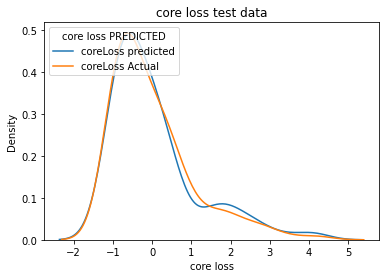

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(y_pred_1_test_dt,hist=False)
sns.distplot(y_test,hist=False)
plt.legend(title='core loss PREDICTED', loc='upper left', labels=['coreLoss predicted','coreLoss Actual'])
plt.xlabel('core loss')
plt.title('core loss test data')

In [21]:
print(X_train.shape)
print(y_train.shape)
print(y_pred_1_test_dt.shape)

(509, 6)
(509, 1)
(128,)


In [22]:
# plt.scatter(X_test['RI'],y_pred_1_test_dt,color='blue')
# plt.plot(np.unique(X_test['RI']), np.poly1d(np.polyfit(y_pred_1_test_dt, X_test['RI'], 1))(np.unique(X_test['RI'])), color='red')

# plt.legend(title='core loss ', loc='upper left', labels=['coreLoss Acyual','DT predicted'])
# plt.xlabel('RI')
# plt.ylabel('core loss')
# plt.title('core loss test data')

In [23]:
y_test_oned=y_test.to_numpy()

In [24]:
arr=y_test_oned.flatten()

In [25]:
d = {'pred': y_pred_1_test_dt, 'actual': arr}
cat = pd.DataFrame(data=d)

In [26]:
cat

,pred,actual
0,1.599483,0.587332
1,-0.310628,-0.219794
2,2.313179,2.313179
3,0.514665,-0.902346
4,-0.819298,-0.827084
...,...,...
123,-0.539010,-0.596106
124,0.156519,0.325211
125,0.675571,0.275901
126,-0.326199,0.961049


###DT TESTING DATA


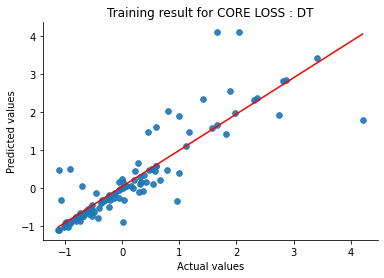

In [27]:
from matplotlib import pyplot as plt
import numpy as np


# Scatter plot with actual values on x-axis and predicted values on y-axis
plt.scatter(cat['actual'], cat['pred'], s=32, alpha=0.9)

# Add a regression line
plt.plot(np.unique(cat['actual']), np.poly1d(np.polyfit(cat['actual'], cat['pred'], 1))(np.unique(cat['actual'])), color='red')

# Remove top and right spines for aesthetics
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Training result for CORE LOSS : DT')
plt.show()


In [28]:
y_pred_cv_dt = decision_tree_regressor.predict(cv_x)

In [29]:
dt=cv_y.to_numpy()
y_cv=dt.flatten()

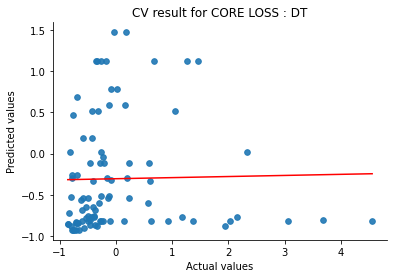

In [30]:
from matplotlib import pyplot as plt
import numpy as np


# Scatter plot with actual values on x-axis and predicted values on y-axis
plt.scatter(y_cv, y_pred_cv_dt, s=32, alpha=0.9)

# Add a regression line
plt.plot(np.unique(y_cv), np.poly1d(np.polyfit(y_cv, y_pred_cv_dt, 1))(np.unique(y_cv)), color='red')

# Remove top and right spines for aesthetics
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('CV result for CORE LOSS : DT')
plt.show()


In [31]:
# Evaluate the models using mean squared error (or other appropriate regression metrics)
mse_1_DT_cv = mean_squared_error(cv_y, y_pred_cv_dt)
print("Mean Squared Error for Target Variable 1:", mse_1_DT_cv)

Mean Squared Error for Target Variable 1: 1.5202079008195692


#KNN


In [32]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Create separate KNN regression models for each target variable
knn_regressor_1 = KNeighborsRegressor(n_neighbors=3)  # Adjust the number of neighbors as needed


# Train the models
knn_regressor_1.fit(X_train, y_train)


# Make predictions on the test set
y_pred_1_kt = knn_regressor_1.predict(X_test)


# Evaluate the models using mean squared error (or other appropriate regression metrics)
mse_1_kt = mean_squared_error(y_test, y_pred_1_kt)
print("Mean Squared Error for Target Variable 1:", mse_1_kt)


Mean Squared Error for Target Variable 1: 0.13623077833783465


In [33]:
y_pred_cv_kt = knn_regressor_1.predict(cv_x)
# Evaluate the models using mean squared error (or other appropriate regression metrics)
mse_1_kt_cv = mean_squared_error(cv_y, y_pred_cv_kt)
print("Mean Squared Error for Target Variable 1:", mse_1_kt_cv)

Mean Squared Error for Target Variable 1: 1.4548634423908204


In [34]:
y_pred_1_kt.flatten()

array([ 0.49217235, -0.25448349,  1.73357094, -0.87552882, -0.83400468,
        2.26127348, -0.91359261, -0.99231544,  3.16788374,  0.02416076,
       -0.43260472, -0.5338198 ,  0.51899002,  0.66008557, -0.32619913,
        0.05703403,  0.90481843,  0.19631289,  0.48784692,  0.25686892,
       -0.49662109, -0.79507581, -0.31149266, -0.61340772, -0.50613704,
       -0.72327366,  2.20850323,  1.13666151, -0.93954519, -0.57274867,
        1.11935979, -0.67309866, -0.11857846, -1.05373656, -0.93521976,
       -0.75095641, -0.29505603,  2.15573297, -0.52516894, -1.01567277,
        1.51297398, -0.96549777, -0.04331596, -0.92829907,  0.87108007,
       -0.59351074,  0.47746589, -0.97501372, -0.39540602,  0.63145122,
        2.87981006,  0.07433575,  0.88059602, -0.61427281,  0.41517968,
       -0.60302669,  1.62803043, -1.02259346, -0.20076164, -0.54852626,
        1.90139765, -0.8763939 , -0.42568403,  0.06741506, -0.66185254,
        1.78893645,  0.21361462, -0.93521976, -0.91445769,  0.88

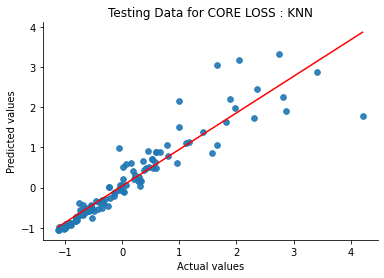

In [35]:

from matplotlib import pyplot as plt
import numpy as np


# Scatter plot with actual values on x-axis and predicted values on y-axis
plt.scatter(cat['actual'], y_pred_1_kt.flatten(), s=32, alpha=0.9)

# Add a regression line
plt.plot(np.unique(cat['actual']), np.poly1d(np.polyfit(cat['actual'], y_pred_1_kt.flatten(), 1))(np.unique(cat['actual'])), color='red')

# Remove top and right spines for aesthetics
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Testing Data for CORE LOSS : KNN')
plt.show()


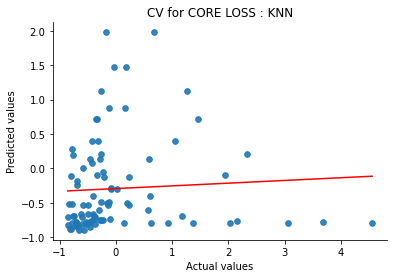

In [36]:

from matplotlib import pyplot as plt
import numpy as np


# Scatter plot with actual values on x-axis and predicted values on y-axis
plt.scatter(y_cv, y_pred_cv_kt.flatten(), s=32, alpha=0.9)

# Add a regression line
plt.plot(np.unique(y_cv), np.poly1d(np.polyfit(y_cv, y_pred_cv_kt.flatten(), 1))(np.unique(y_cv)), color='red')

# Remove top and right spines for aesthetics
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('CV for CORE LOSS : KNN')
plt.show()


#KNN WL VS CORE LOSS

Text(0.5, 1.0, 'Wavelength vs CM: Testing')

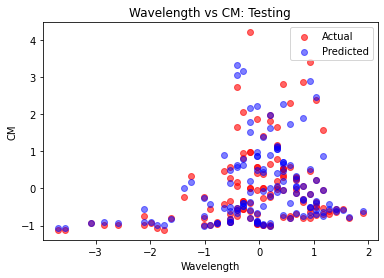

In [37]:
plt.scatter(X_test['wl'] ,y_test, alpha=0.6, color='red')
plt.scatter(X_test['wl'] ,y_pred_1_kt, alpha=0.5, color='blue')
plt.xlabel('Wavelength')
plt.ylabel('CM')
plt.legend(loc='upper right',labels=['Actual','Predicted'])
plt.title('Wavelength vs CM: Testing')

Text(0.5, 1.0, 'Wavelength vs CM: cross validation')

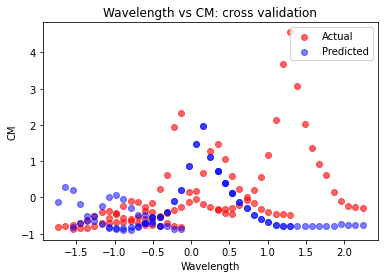

In [38]:
plt.scatter(cv_x['wl'] ,cv_y, alpha=0.6, color='red')
plt.scatter(cv_x['wl'] ,y_pred_cv_kt, alpha=0.5, color='blue')
plt.xlabel('Wavelength')
plt.ylabel('CM')
plt.legend(loc='upper right',labels=['Actual','Predicted'])
plt.title('Wavelength vs CM: cross validation')

#SVM

In [39]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Create separate SVM regression models for each target variable
svm_regressor_1 = SVR(kernel='linear')  # Adjust the kernel and other parameters as needed


# Train the models
svm_regressor_1.fit(X_train, y_train)


# Make predictions on the test set
y_pred_1_st = svm_regressor_1.predict(X_test)


# Evaluate the models using mean squared error (or other appropriate regression metrics)
mse_1_SVR_t = mean_squared_error(y_test, y_pred_1_st)

print("Mean Squared Error for CM (TEST):", mse_1_SVR_t)

#CV

y_pred_cv_sv = svm_regressor_1.predict(cv_x)
# Evaluate the models using mean squared error (or other appropriate regression metrics)
mse_1_sv_cv = mean_squared_error(cv_y, y_pred_cv_sv)
print("Mean Squared Error for CM (CV):", mse_1_sv_cv)

Mean Squared Error for CM (TEST): 0.8818112251832757
Mean Squared Error for CM (CV): 0.9145855807809669


C:\Users\yarim\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


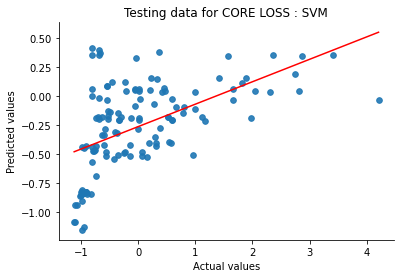

In [40]:

from matplotlib import pyplot as plt
import numpy as np


# Scatter plot with actual values on x-axis and predicted values on y-axis
plt.scatter(cat['actual'], y_pred_1_st.flatten(), s=32, alpha=0.9)

# Add a regression line
plt.plot(np.unique(cat['actual']), np.poly1d(np.polyfit(cat['actual'], y_pred_1_st.flatten(), 1))(np.unique(cat['actual'])), color='red')

# Remove top and right spines for aesthetics
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Testing data for CORE LOSS : SVM')
plt.show()


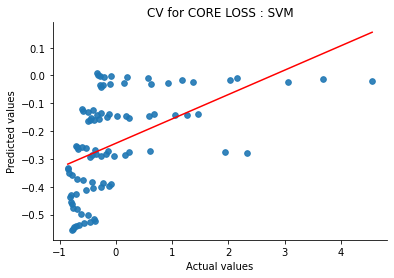

In [41]:

from matplotlib import pyplot as plt
import numpy as np


# Scatter plot with actual values on x-axis and predicted values on y-axis
plt.scatter(y_cv, y_pred_cv_sv.flatten(), s=32, alpha=0.9)

# Add a regression line
plt.plot(np.unique(y_cv), np.poly1d(np.polyfit(y_cv, y_pred_cv_sv.flatten(), 1))(np.unique(y_cv)), color='red')

# Remove top and right spines for aesthetics
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('CV for CORE LOSS : SVM')
plt.show()


#XGBOOST

In [42]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Create separate XGBoost regression models for each target variable
xgb_regressor_1 = xgb.XGBRegressor()  # You can adjust hyperparameters as needed


# Train the models
xgb_regressor_1.fit(X_train, y_train)


# Make predictions on the test set
y_pred_1_xg_t = xgb_regressor_1.predict(X_test)


# Evaluate the models using mean squared error (or other appropriate regression metrics)
mse_1_xg_t = mean_squared_error(y_test, y_pred_1_xg_t)


print("Mean Squared Error for Target Variable 1:", mse_1_xg_t)

y_pred_cv_xg = xgb_regressor_1.predict(cv_x)
# Evaluate the models using mean squared error (or other appropriate regression metrics)
mse_1_xg_cv = mean_squared_error(cv_y, y_pred_cv_xg)
print("Mean Squared Error for CM (CV):", mse_1_xg_cv)

Mean Squared Error for Target Variable 1: 0.14075780828936363
Mean Squared Error for CM (CV): 1.3149735273665215


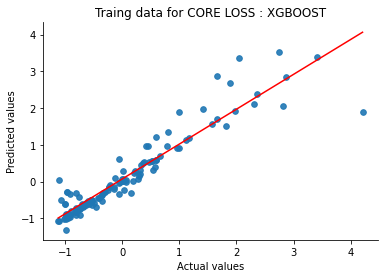

In [43]:

from matplotlib import pyplot as plt
import numpy as np


# Scatter plot with actual values on x-axis and predicted values on y-axis
plt.scatter(cat['actual'], y_pred_1_xg_t.flatten(), s=32, alpha=0.9)

# Add a regression line
plt.plot(np.unique(cat['actual']), np.poly1d(np.polyfit(cat['actual'], y_pred_1_xg_t.flatten(), 1))(np.unique(cat['actual'])), color='red')

# Remove top and right spines for aesthetics
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Traing data for CORE LOSS : XGBOOST')
plt.show()


##XGBOOST WL VS CORE LOSS

Text(0.5, 1.0, 'Wavelength vs Core Loss: Testing')

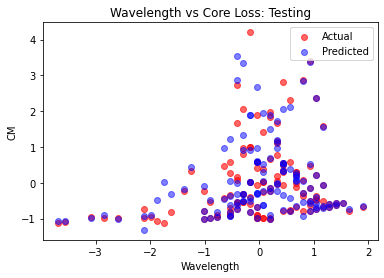

In [44]:
plt.scatter(X_test['wl'] ,y_test, alpha=0.6, color='red')
plt.scatter(X_test['wl'] ,y_pred_1_xg_t, alpha=0.5, color='blue')
plt.xlabel('Wavelength')
plt.ylabel('CM')
plt.legend(loc='upper right',labels=['Actual','Predicted'])
plt.title('Wavelength vs Core Loss: Testing')

Text(0.5, 1.0, 'Wavelength vs Core Loss: cross validation')

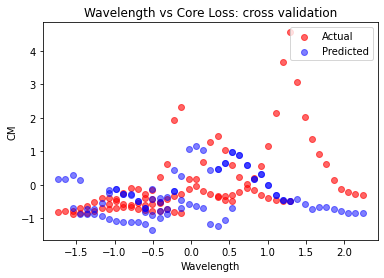

In [45]:
plt.scatter(cv_x['wl'] ,cv_y, alpha=0.6, color='red')
plt.scatter(cv_x['wl'] ,y_pred_cv_xg, alpha=0.5, color='blue')
plt.xlabel('Wavelength')
plt.ylabel('CM')
plt.legend(loc='upper right',labels=['Actual','Predicted'])
plt.title('Wavelength vs Core Loss: cross validation')

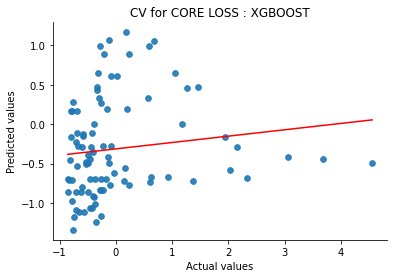

In [46]:

from matplotlib import pyplot as plt
import numpy as np


# Scatter plot with actual values on x-axis and predicted values on y-axis
plt.scatter(y_cv, y_pred_cv_xg.flatten(), s=32, alpha=0.9)

# Add a regression line
plt.plot(np.unique(y_cv), np.poly1d(np.polyfit(y_cv, y_pred_cv_xg.flatten(), 1))(np.unique(y_cv)), color='red')

# Remove top and right spines for aesthetics
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('CV for CORE LOSS : XGBOOST')
plt.show()


#CV GRAPH

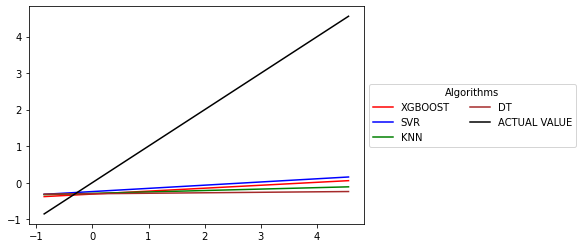

In [47]:
plt.plot(np.unique(y_cv), np.poly1d(np.polyfit(y_cv, y_pred_cv_xg.flatten(), 1))(np.unique(y_cv)), color='red')

plt.plot(np.unique(y_cv), np.poly1d(np.polyfit(y_cv, y_pred_cv_sv.flatten(), 1))(np.unique(y_cv)), color='blue')

plt.plot(np.unique(y_cv), np.poly1d(np.polyfit(y_cv, y_pred_cv_kt.flatten(), 1))(np.unique(y_cv)), color='green')

plt.plot(np.unique(y_cv), np.poly1d(np.polyfit(y_cv, y_pred_cv_dt, 1))(np.unique(y_cv)), color='brown')

plt.plot(np.unique(y_cv), np.poly1d(np.polyfit(y_cv, y_cv, 1))(np.unique(y_cv)), color='black')

plt.legend(title='Algorithms', loc='upper left', labels=['XGBOOST','SVR','KNN','DT','ACTUAL VALUE'], ncol=2)

#Testing Graph

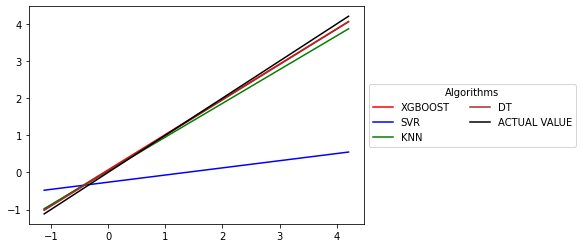

In [48]:
plt.plot(np.unique(cat['actual']), np.poly1d(np.polyfit(cat['actual'], y_pred_1_xg_t.flatten(), 1))(np.unique(cat['actual'])), color='red')

plt.plot(np.unique(cat['actual']), np.poly1d(np.polyfit(cat['actual'], y_pred_1_st.flatten(), 1))(np.unique(cat['actual'])), color='blue')

plt.plot(np.unique(cat['actual']), np.poly1d(np.polyfit(cat['actual'], y_pred_1_kt.flatten(), 1))(np.unique(cat['actual'])), color='green')

plt.plot(np.unique(cat['actual']), np.poly1d(np.polyfit(cat['actual'], cat['pred'], 1))(np.unique(cat['actual'])), color='brown')

plt.plot(np.unique(cat['actual']), np.poly1d(np.polyfit(cat['actual'], cat['actual'], 1))(np.unique(cat['actual'])), color='black')
plt.legend(title='Algorithms', loc='center left', labels=['XGBOOST','SVR','KNN','DT','ACTUAL VALUE'], bbox_to_anchor=(1, 0.5),ncol=2)

#MSE SCORE

In [49]:
print('MSE SCORE FOR core loss ON TEST DATA\n')
print('DT: ',mse_1_DT)
print('KNN: ',mse_1_kt)
print('XG BOOST:',mse_1_xg_t)
print('SVR: ',mse_1_SVR_t)

print('\nMSE SCORE FOR CORE LOSS ON CROSS VALIDATION DATA\n')
print('DT: ',mse_1_DT_cv)
print('KNN: ',mse_1_kt_cv)
print('XG BOOST: ',mse_1_xg_cv)
print('SVR: ',mse_1_sv_cv)

print('\n MINIMUM MSE SCORE \n')
print('For testing data')
print('KNN: ',mse_1_kt)
print('\nFOR CV DATA')
print('SVR: ',mse_1_sv_cv)

MSE SCORE FOR core loss ON TEST DATA

DT:  0.25796196803896576
KNN:  0.13623077833783465
XG BOOST: 0.14075780828936363
SVR:  0.8818112251832757

MSE SCORE FOR CORE LOSS ON CROSS VALIDATION DATA

DT:  1.5202079008195692
KNN:  1.4548634423908204
XG BOOST:  1.3149735273665215
SVR:  0.9145855807809669

 MINIMUM MSE SCORE 

For testing data
KNN:  0.13623077833783465

FOR CV DATA
SVR:  0.9145855807809669


#NEURAL NETWORK

In [51]:
print(X_train.shape)
print(y_train.shape)

(509, 6)
(509, 1)


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical




# Build the model
model = Sequential()
model.add(Dense(7, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='softmax'))  # Assuming 2 classes in the output layer

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=5, validation_split=0.2)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, np.argmax(y_pred, axis=1))
print("Mean Squared Error:", mse)


C:\Users\yarim\anaconda3\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (2.0.6) or chardet (4.0.0)/charset_normalizer (3.3.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


Epoch 1/10
82/82 [==============================] - 3s 15ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
82/82 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/10
82/82 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/10
82/82 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/10
82/82 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/10
82/82 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/10
82/82 [==============================] - 0s 3ms/step

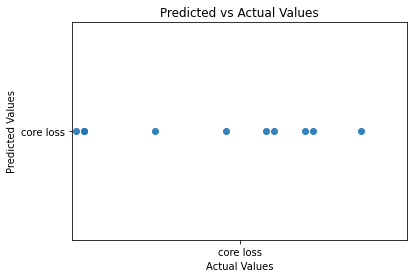

In [53]:
# Plot predicted vs actual values with a regression line
plt.scatter(y_test, np.argmax(y_pred, axis=1), alpha=0.9)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

In [54]:
y_test

,core loss
260,0.587332
228,-0.219794
31,2.313179
507,-0.902346
503,-0.827084
...,...
416,-0.596106
174,0.325211
274,0.275901
518,0.961049


In [55]:
y_predcv=model.predict(cv_x)

3/3 [==============================] - 0s 3ms/step


In [56]:
mse = mean_squared_error(cv_y, np.argmax(y_predcv, axis=1))
print("Mean Squared Error:", mse)

Mean Squared Error: 1.0


In [57]:
# y_predcv

#BELL GRAPH FOR CORE LOSS CV

C:\Users\yarim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\yarim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\yarim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

Text(0.5, 1.0, 'Core Loss cross validation')

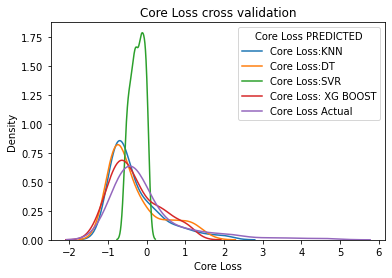

In [50]:
import seaborn as sns
sns.distplot(y_pred_cv_kt,hist=False)
sns.distplot(y_pred_cv_dt,hist=False)
sns.distplot(y_pred_cv_sv,hist=False)
sns.distplot(y_pred_cv_xg,hist=False)
sns.distplot(cv_y,hist=False)
plt.legend(title='Core Loss PREDICTED', loc='upper right', labels=['Core Loss:KNN','Core Loss:DT','Core Loss:SVR','Core Loss: XG BOOST' ,'Core Loss Actual'])
plt.xlabel('Core Loss')
plt.title('Core Loss cross validation')

##BELL GRAPH FOR CORE LOSS Test data

C:\Users\yarim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\yarim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\yarim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

Text(0.5, 1.0, 'Core Loss test data')

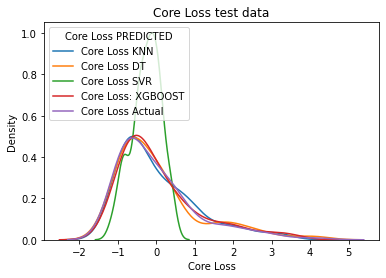

In [51]:
import seaborn as sns
sns.distplot(y_pred_1_kt,hist=False)
sns.distplot(y_pred_1_test_dt,hist=False)
sns.distplot(y_pred_1_st,hist=False)
sns.distplot(y_pred_1_xg_t,hist=False)
sns.distplot(y_test,hist=False)
plt.legend(title='Core Loss PREDICTED', loc='upper left', labels=['Core Loss KNN','Core Loss DT','Core Loss SVR','Core Loss: XGBOOST','Core Loss Actual'])
plt.xlabel('Core Loss')
plt.title('Core Loss test data')



# DESACLING

In [52]:
# Descale the cv DataFrame
y=y_pred_cv_xg.reshape(-1,1)
original_data_cv_pred = scalery.inverse_transform(y)
descaled_cv_pred = pd.DataFrame(original_data_cv_pred, index=cv_y.index, columns=cv_y.columns)

In [53]:
cv['core loss'].unique()

array([  3.2,   3.6,   4.1,   5.7,   7.2,   9.9,  12.4,  12.7,  10.8,
         8.7,   6.7,   5.5,   4.5,   3.8,   2.1,   2.3,   2.7,   3.9,
         8.3,  11.7,  16.1,  19.2,  18.5,  15.3,  12.1,   9.2,   5.4,
         3.5,   2.8,   5.8,   6.3,   7.9,   9.3,  17.9,  26.2,  34.8,
        64.3,  72.9,  24.8,  20.4,  17.4,  15.2,  13.2,  11.5,  10.7,
         7.7,  11.9,  13.5,  25.1,  36.1,  49.4,  53.8,  44.6,  34.1,
        26.5,  21.5,  17.7,  14.3,  12.5,  11.3,  10.2,  13.8,  14.1,
        14.7,  16.4,  19.3,  25.7,  33.7,  47.1,  68.9, 102.9, 122.5,
        89.4,  66.2,  51.5,  41.7,  34.9,  24.3,  18.7,  16.2,  14.8])

In [54]:
original_data_cv_pred.flatten()

array([24.949884  , 24.949884  , 27.43582   , 24.742527  ,  2.0501218 ,
        2.0501218 ,  0.6777388 , -1.3464121 , -2.480575  , -3.5677428 ,
       -3.5677428 , -3.138124  , -5.044107  , -8.682021  , -0.66095674,
        5.7825236 ,  1.8767458 ,  5.2600713 ,  5.2600713 ,  9.337317  ,
       17.674526  , 18.795368  , 15.063163  , 15.063163  , 10.21087   ,
        5.7838454 ,  0.9133307 ,  9.911307  ,  2.0366216 , 17.391397  ,
       11.113368  , 16.055964  , 18.730618  , 15.063163  , 14.782932  ,
       10.362655  ,  5.7838454 , 11.844266  ,  3.867293  ,  4.9483075 ,
       17.391397  ,  6.0236344 ,  8.780803  ,  7.3837514 ,  5.5995984 ,
       -4.833629  , -6.3165298 , -2.391067  ,  5.5582614 ,  3.4772038 ,
       18.308224  , 12.570038  , 13.192969  , 30.907436  , 27.101057  ,
       44.97756   , 47.076855  , 44.486015  , 31.278313  , 31.515787  ,
       35.441254  , 43.251663  , 40.93135   , 34.628475  , 25.40364   ,
       28.420858  , 21.187517  , 14.706037  , 11.293107  , 10.33

In [55]:
cv['RI'].unique()

array([1.36, 1.37, 1.38, 1.39, 1.4 ])

In [56]:
x=cv['RI']
ri36=cv[x<1.37]
ri37=cv[x==1.37]
ri38=cv[x==1.38]
ri39=cv[x==1.39]
ri40=cv[x==1.40]

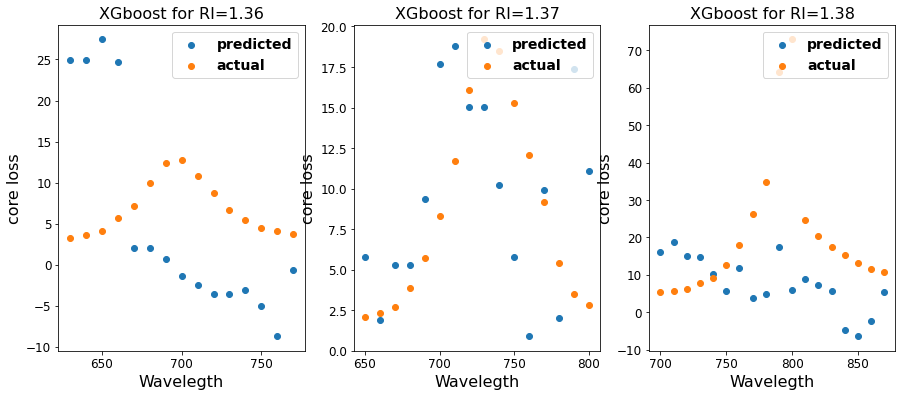

In [103]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
legend_properties = {'weight':'bold','size':14}

ax = axes[0]
ax.scatter(ri36['wl'], original_data_cv_pred.flatten()[:15])
ax.scatter(ri36['wl'], ri36['core loss'])
ax.set_xlabel('Wavelegth',fontsize=16)
ax.set_ylabel('core loss',fontsize=16)
ax.set_title('XGboost for RI=1.36',fontsize=16)
ax.legend(loc='upper right',labels=['predicted','actual'],prop=legend_properties)
ax.tick_params(axis='both', labelsize=12)
ax = axes[1]
ax.scatter(ri37['wl'], original_data_cv_pred.flatten()[15:31])
ax.scatter(ri37['wl'], ri37['core loss'])
ax.set_xlabel('Wavelegth',fontsize=16)
ax.set_ylabel('core loss',fontsize=16)
ax.set_title('XGboost for RI=1.37',fontsize=16)
ax.legend(loc='upper right',labels=['predicted','actual'],prop=legend_properties)
ax.tick_params(axis='both', labelsize=12)
ax = axes[2]
ax.scatter(ri38['wl'], original_data_cv_pred.flatten()[31:49])
ax.scatter(ri38['wl'], ri38['core loss'])
ax.legend(loc='upper right',labels=['predicted','actual'],prop=legend_properties)
ax.set_xlabel('Wavelegth',fontsize=16)
ax.set_ylabel('core loss',fontsize=16)
ax.set_title('XGboost for RI=1.38',fontsize=16)
ax.tick_params(axis='both', labelsize=12)
plt.savefig('XG_CR_1_2.jpg', dpi=1500,bbox_inches = 'tight')







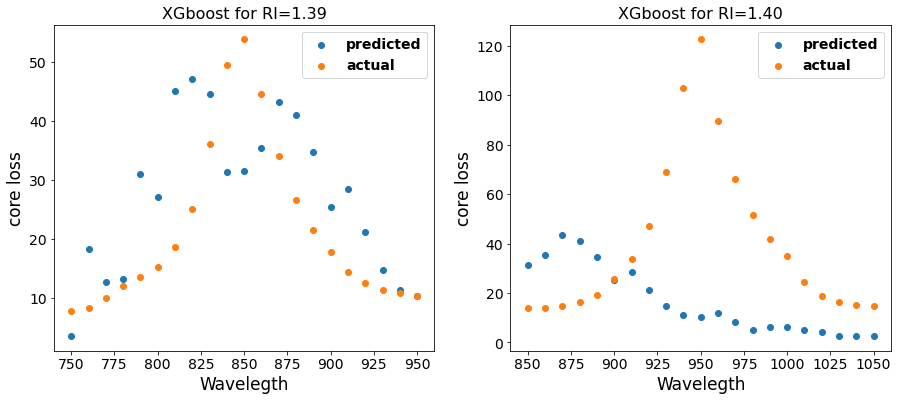

In [105]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ax = axes[0]
ax.scatter(ri39['wl'], original_data_cv_pred.flatten()[49:70])
ax.scatter(ri39['wl'], ri39['core loss'])
ax.set_xlabel('Wavelegth',fontsize=17)
ax.set_ylabel('core loss',fontsize=17)
ax.set_title('XGboost for RI=1.39',fontsize=16)
ax.legend(loc='upper right',labels=['predicted','actual'],prop=legend_properties)
ax.tick_params(axis='both', labelsize=14)
ax = axes[1]
ax.scatter(ri40['wl'], original_data_cv_pred.flatten()[70:111])
ax.scatter(ri40['wl'], ri40['core loss'])
ax.set_xlabel('Wavelegth',fontsize=17)
ax.set_ylabel('core loss',fontsize=17)
ax.set_title('XGboost for RI=1.40',fontsize=16)
ax.legend(loc='upper right',labels=['predicted','actual'],prop=legend_properties)
ax.tick_params(axis='both', labelsize=14)
plt.savefig('XG_wl_cr_2.jpg',dpi=1300,bbox_inches = 'tight')

In [61]:
# Descale the cv DataFrame
y=y_pred_cv_kt.reshape(-1,1)
cv_pred_kt = scalery.inverse_transform(y)


In [62]:
cv_pred_kt=cv_pred_kt.flatten()

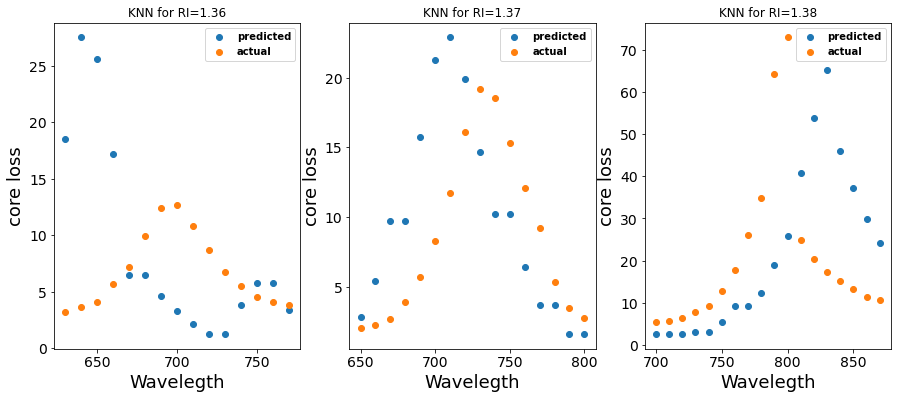

In [63]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))


ax = axes[0]
ax.scatter(ri36['wl'], cv_pred_kt[:15])
ax.scatter(ri36['wl'], ri36['core loss'])
ax.set_xlabel('Wavelegth',fontsize=18)
ax.set_ylabel('core loss',fontsize=18)
ax.set_title('KNN for RI=1.36')
ax.legend(loc='upper right',labels=['predicted','actual'],prop=legend_properties)
ax.tick_params(axis='both', labelsize=14)
ax = axes[1]
ax.scatter(ri37['wl'], cv_pred_kt[15:31])
ax.scatter(ri37['wl'], ri37['core loss'])
ax.set_xlabel('Wavelegth',fontsize=18)
ax.set_ylabel('core loss',fontsize=18)
ax.set_title('KNN for RI=1.37')
ax.legend(loc='upper right',labels=['predicted','actual'],prop=legend_properties)
ax.tick_params(axis='both', labelsize=14)
ax = axes[2]
ax.scatter(ri38['wl'], cv_pred_kt[31:49])
ax.scatter(ri38['wl'], ri38['core loss'])
ax.legend(loc='upper right',labels=['predicted','actual'],prop=legend_properties)
ax.set_xlabel('Wavelegth',fontsize=18)
ax.set_ylabel('core loss',fontsize=18)
ax.tick_params(axis='both', labelsize=14)
ax.set_title('KNN for RI=1.38')
plt.savefig('crKNN1.jpg',dpi=1300,bbox_inches = 'tight')

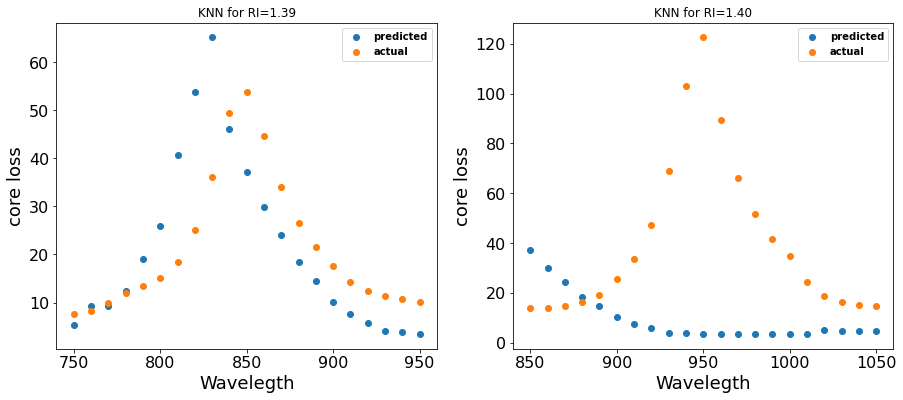

In [64]:
legend_properties = {'weight':'bold'}
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ax = axes[0]
ax.scatter(ri39['wl'], cv_pred_kt[49:70])
ax.scatter(ri39['wl'], ri39['core loss'])
ax.set_xlabel('Wavelegth',fontsize=18)
ax.set_ylabel('core loss',fontsize=18)
ax.set_title('KNN for RI=1.39')
ax.legend(loc='upper right',labels=['predicted','actual'],prop=legend_properties)
ax.tick_params(axis='both', labelsize=16)

ax = axes[1]
ax.scatter(ri40['wl'], cv_pred_kt[70:111])
ax.scatter(ri40['wl'], ri40['core loss'])
ax.set_xlabel('Wavelegth',fontsize=18)
ax.set_ylabel('core loss',fontsize=18)
ax.set_title('KNN for RI=1.40')
ax.tick_params(axis='both', labelsize=16)
ax.legend(loc='upper right',labels=['predicted','actual'],prop=legend_properties)
plt.savefig('myfig.jpg',dpi=1300,bbox_inches = 'tight')

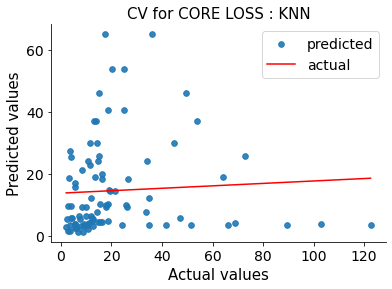

In [68]:

from matplotlib import pyplot as plt
import numpy as np


# Scatter plot with actual values on x-axis and predicted values on y-axis
plt.scatter(cv['core loss'], cv_pred_kt, s=32, alpha=0.9)

# Add a regression line
plt.plot(np.unique(cv['core loss']), np.poly1d(np.polyfit(cv['core loss'], cv_pred_kt, 1))(np.unique(cv['core loss'])), color='red')

# Remove top and right spines for aesthetics
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.xlabel('Actual values',fontsize=15)
plt.ylabel('Predicted values',fontsize=15)
plt.title('CV for CORE LOSS : KNN',fontsize=15)
plt.tick_params(axis='both', labelsize=14)
plt.legend(loc='upper right',labels=['predicted','actual'],fontsize=14)
plt.savefig('crRegKNN.jpg',dpi=1300,bbox_inches='tight')

In [69]:
k=y_pred_1_kt.reshape(-1,1)
y_pred_1_kt_pred = scalery.inverse_transform(k)
y_pred_1_kt_pred=y_pred_1_kt_pred.flatten()

In [70]:
c=y_test_oned.reshape(-1,1)
ca=scalery.inverse_transform(c)

In [71]:
ca=ca.flatten()

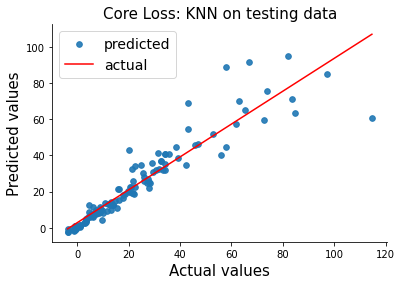

In [73]:

from matplotlib import pyplot as plt
import numpy as np


# Scatter plot with actual values on x-axis and predicted values on y-axis
plt.scatter(ca, y_pred_1_kt_pred, s=32, alpha=0.9)

# Add a regression line
plt.plot(np.unique(ca), np.poly1d(np.polyfit(ca, y_pred_1_kt_pred, 1))(np.unique(ca)), color='red')

# Remove top and right spines for aesthetics
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.xlabel('Actual values',fontsize=15)
plt.ylabel('Predicted values',fontsize=15)
plt.title('Core Loss: KNN on testing data',fontsize=15)
ax.tick_params(axis='both', labelsize=14)
plt.legend(loc='upper left',labels=['predicted','actual'],fontsize=14)
plt.savefig('knn_test.jpg',dpi=1300,bbox_inches='tight')

In [74]:
s=y_pred_cv_sv.reshape(-1,1)
sv = scalery.inverse_transform(s)
sv=sv.flatten()

In [75]:
stest=y_pred_1_st.reshape(-1,1)
svrTest = scalery.inverse_transform(stest)
svrTest=svrTest.flatten()

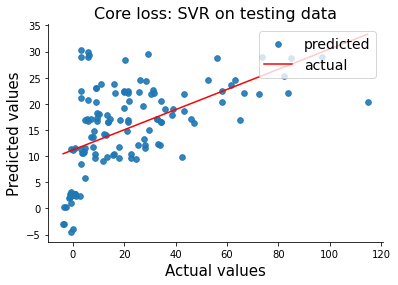

In [76]:

from matplotlib import pyplot as plt
import numpy as np


# Scatter plot with actual values on x-axis and predicted values on y-axis
plt.scatter(ca, svrTest, s=32, alpha=0.9)

# Add a regression line
plt.plot(np.unique(ca), np.poly1d(np.polyfit(ca, svrTest, 1))(np.unique(ca)), color='red')

# Remove top and right spines for aesthetics
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.xlabel('Actual values',fontsize=15)
plt.ylabel('Predicted values',fontsize=15)
plt.title('Core loss: SVR on testing data',fontsize=16)
plt.legend(loc='upper right',labels=['predicted','actual'],fontsize=14)
ax.tick_params(axis='both', labelsize=14)
plt.savefig('SVR_TEST.jpg',dpi=1300,bbox_inches='tight')

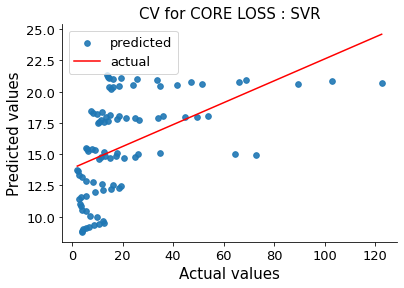

In [81]:

from matplotlib import pyplot as plt
import numpy as np


# Scatter plot with actual values on x-axis and predicted values on y-axis
plt.scatter(cv['core loss'], sv, s=32, alpha=0.9)

# Add a regression line
plt.plot(np.unique(cv['core loss']), np.poly1d(np.polyfit(cv['core loss'], sv, 1))(np.unique(cv['core loss'])), color='red')

# Remove top and right spines for aesthetics
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.xlabel('Actual values',fontsize=15)
plt.ylabel('Predicted values',fontsize=15)
plt.title('CV for CORE LOSS : SVR',fontsize=15)
plt.tick_params(axis='both', labelsize=13)
plt.legend(loc='upper left',labels=['predicted','actual'],fontsize=13)
plt.savefig('SVR_CV.jpg',dpi=1300,bbox_inches='tight')

# DESCALED TEST VALUE

In [82]:
dt=y_pred_1_test_dt.reshape(-1,1)
dtr = scalery.inverse_transform(dt)
dtr=dtr.flatten()

In [83]:
kt=y_pred_1_kt.reshape(-1,1)
knt = scalery.inverse_transform(kt)
knt=knt.flatten()

In [84]:
st=y_pred_1_st.reshape(-1,1)
svrt = scalery.inverse_transform(st)
svrt=svrt.flatten()

In [85]:
xg=y_pred_1_xg_t.reshape(-1,1)
xgt = scalery.inverse_transform(xg)
xgt=xgt.flatten()

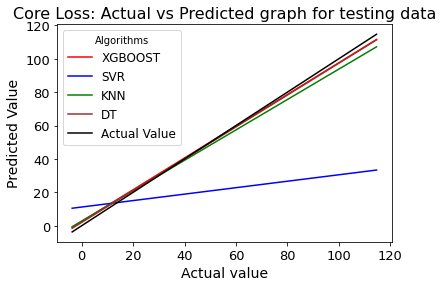

In [90]:
plt.plot(np.unique(ca), np.poly1d(np.polyfit(ca, xgt, 1))(np.unique(ca)), color='red')

plt.plot(np.unique(ca), np.poly1d(np.polyfit(ca, svrt, 1))(np.unique(ca)), color='blue')

plt.plot(np.unique(ca), np.poly1d(np.polyfit(ca, knt, 1))(np.unique(ca)), color='green')

plt.plot(np.unique(ca), np.poly1d(np.polyfit(ca, dtr, 1))(np.unique(ca)), color='brown')
plt.xlabel('Actual value',fontsize=14)
plt.ylabel('Predicted Value',fontsize=14)
plt.plot(np.unique(ca), np.poly1d(np.polyfit(ca, ca, 1))(np.unique(ca)), color='black')
plt.title('Core Loss: Actual vs Predicted graph for testing data',fontsize=16)
plt.tick_params(axis='both', labelsize=13)
plt.legend(title='Algorithms', loc='upper left', labels=['XGBOOST','SVR','KNN','DT','Actual Value'],ncol=1,fontsize=12)
plt.savefig('cr_test.jpg',dpi=1300,bbox_inches='tight')

C:\Users\yarim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\yarim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\yarim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\yarim\anacond

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

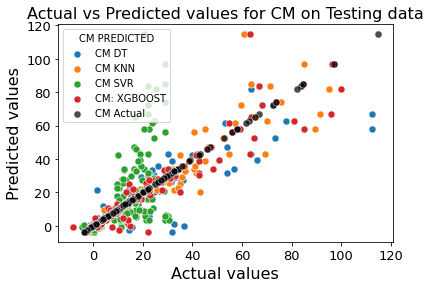

In [87]:
import seaborn as sns
sns.scatterplot(dtr,ca,s=50,alpha=1)
sns.scatterplot(knt,ca,s=50,alpha=1)
sns.scatterplot(svrt,ca,s=50,alpha=1)
sns.scatterplot(xgt,ca,s=50,alpha=1)
sns.scatterplot(ca,ca,color='black',s=50,alpha=0.7)
plt.legend(title='CM PREDICTED', loc='upper left', labels=['CM DT','CM KNN','CM SVR','CM: XGBOOST','CM Actual'])
plt.xlabel('CM')
plt.title('CM test data')
plt.xlabel('Actual values',fontsize=16)
plt.ylabel('Predicted values',fontsize=16)
plt.title('Actual vs Predicted values for CM on Testing data',fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.save

In [93]:
d=y_pred_cv_dt.reshape(-1,1)
dCV = scalery.inverse_transform(d)
dCV=dCV.flatten()

In [94]:
k=y_pred_cv_kt.reshape(-1,1)
kCV = scalery.inverse_transform(k)
kCV=kCV.flatten()

In [95]:
s=y_pred_cv_sv.reshape(-1,1)
sCV = scalery.inverse_transform(s)
sCV=sCV.flatten()

In [96]:
x=y_pred_cv_xg.reshape(-1,1)
xCV = scalery.inverse_transform(x)
xCV=xCV.flatten()

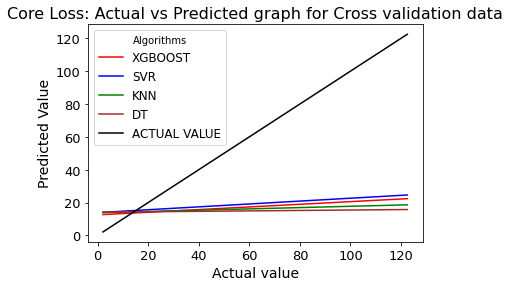

In [100]:
plt.plot(np.unique(cv['core loss']), np.poly1d(np.polyfit(cv['core loss'], xCV, 1))(np.unique(cv['core loss'])), color='red')

plt.plot(np.unique(cv['core loss']), np.poly1d(np.polyfit(cv['core loss'], sCV, 1))(np.unique(cv['core loss'])), color='blue')

plt.plot(np.unique(cv['core loss']), np.poly1d(np.polyfit(cv['core loss'], kCV, 1))(np.unique(cv['core loss'])), color='green')

plt.plot(np.unique(cv['core loss']), np.poly1d(np.polyfit(cv['core loss'], dCV, 1))(np.unique(cv['core loss'])), color='brown')

plt.plot(np.unique(cv['core loss']), np.poly1d(np.polyfit(cv['core loss'], cv['core loss'], 1))(np.unique(cv['core loss'])), color='black')
plt.xlabel('Actual value',fontsize=14)
plt.ylabel('Predicted Value',fontsize=14)
plt.title('Core Loss: Actual vs Predicted graph for Cross validation data',fontsize=16)
plt.tick_params(axis='both', labelsize=13)
plt.legend(title='Algorithms', loc='upper left', labels=['XGBOOST','SVR','KNN','DT','ACTUAL VALUE'],fontsize=12)
plt.savefig('crCV.jpg',dpi=1300,bbox_inches='tight')

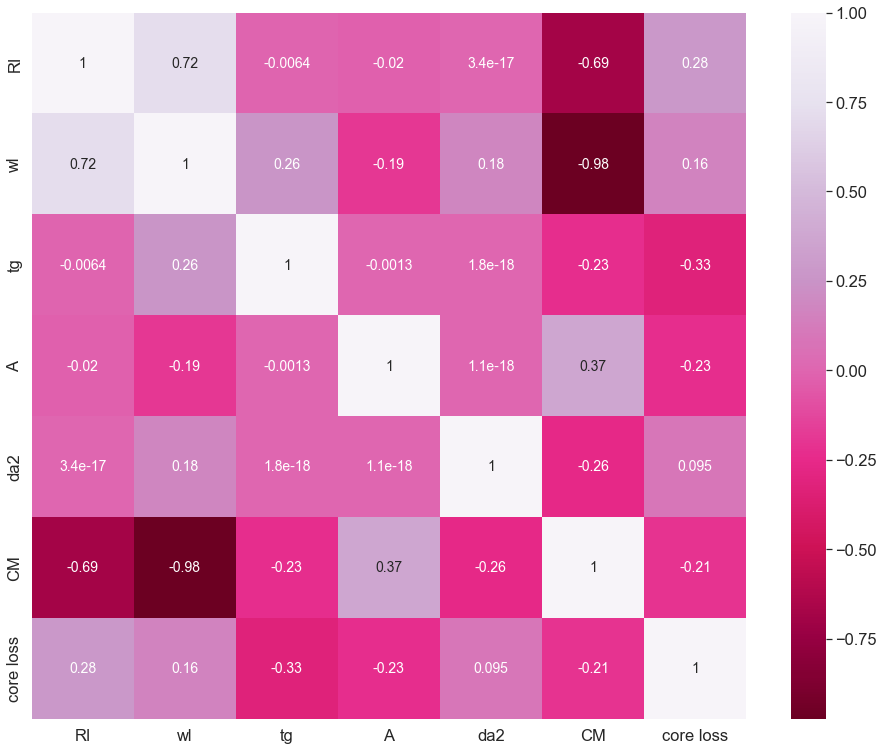

In [113]:
sns.set(font_scale=1.5)
fig , ax = plt.subplots(figsize = (16,13))
sns.heatmap(df.corr(),annot=True,center = 0 , cmap ='PuRd_r', annot_kws={"size": 14})
plt.savefig('heatmap.jpg',dpi=1400,bbox_inches='tight')